In [42]:
# Import standard libraries
import warnings

# Import third-party libraries
import fim
import pandas as pd
from getpass import getpass
import matplotlib.pyplot as plt

# Import custom libraries
import nxtools
from bitcoin import utils, extract, clean, eda, lsa, lsa_plot, ns

In [2]:
warnings.filterwarnings('ignore')

# The Bitcoin Network

## 1 Data Extraction

In [3]:
# api_key = getpass()

In [4]:
# headers = {'Accepts': 'application/json',
#            'X-CMC_PRO_API_KEY': f'{api_key}'}
# session = Session()
# session.headers.update(headers)

### 1.1 Coin Info Extraction

#### Get listings

In [5]:
# listings = extract.listings(session)

#### Get coins

In [6]:
# coin_ids = [str(coin['id']) for coin in listings]

In [7]:
# coins = extract.coin_info(session, coin_ids)

#### Get slugs

In [8]:
# slugs = [coin['slug'] for coin in coins]

### 1.2 Description Extraction

In [9]:
# # Set filepath to save
# desc_filepath = 'data/descriptions.json'
# res = extract.descriptions(slugs, save_to_filepath=desc_filepath)

## 2 Data Preprocessing

### 2.1 Loading the data

In [10]:
# Set description filepath
desc_filepath = 'data/descriptions.json'

# Load json file
coin_desc = utils.load_json(desc_filepath)

In [11]:
utils.preview(coin_desc, batch_num=1, attr='desc', slug=None)


| BITCOIN |

Loading Data

Please wait, we are loading chart data

The live Bitcoin price today is $55,664.85 USD with a 24-hour trading volume of $73,231,967,581 USD. Bitcoin is down 4.71% in the last 24 hours. The current CoinMarketCap ranking is #1, with a live market cap of $1,039,610,677,702 USD. It has a circulating supply of 18,676,250 BTC coins and a max. supply of 21,000,000 BTC coins.

The top exchanges for trading in Bitcoin are currently Binance, Huobi Global, OKEx, Upbit,  and HBTC. You can find others listed on our crypto exchanges page.

Bitcoin is a decentralized cryptocurrency originally described in a 2008 whitepaper by a person, or group of people, using the alias Satoshi Nakamoto. It was launched soon after, in January 2009.

Bitcoin is a peer-to-peer online currency, meaning that all transactions happen directly between equal, independent network participants, without the need for any intermediary to permit or facilitate them. Bitcoin was created, according to Nak

### 2.2 Remove Irrelevant Paragraphs

In [12]:
coin_desc_cleaned = clean.coin_desc_cleaner(coin_desc)

In [13]:
utils.preview(coin_desc_cleaned, batch_num=1, batch_size=10,
              attr='clean_desc', slug=None)


| BITCOIN |

Bitcoin is a decentralized cryptocurrency originally described in a 2008 whitepaper by a person, or group of people, using the alias Satoshi Nakamoto. It was launched soon after, in January 2009.

Bitcoin is a peer-to-peer online currency, meaning that all transactions happen directly between equal, independent network participants, without the need for any intermediary to permit or facilitate them. Bitcoin was created, according to Nakamoto’s own words, to allow “online payments to be sent directly from one party to another without going through a financial institution.”

Some concepts for a similar type of a decentralized electronic currency precede BTC, but Bitcoin holds the distinction of being the first-ever cryptocurrency to come into actual use.

On October 31, 2008, Nakamoto published Bitcoin’s whitepaper, which described in detail how a peer-to-peer, online currency could be implemented. They proposed to use a decentralized ledger of transactions packaged in batc

### 2.3 Text Cleaning

In [14]:
coin_desc_df = clean.get_coin_desc_df(coin_desc_cleaned)

In [15]:
coin_desc_df['clean_desc'] = coin_desc_df.desc.apply(clean.text_cleaner)

## 3 Exploratory Data Analysis

### 3.1 Simple Statistics

#### Number of words per coin description

In [16]:
num_words = coin_desc_df.clean_desc.apply(lambda x: len(x.split()))

In [17]:
num_words.describe().to_frame('Number of Words').iloc[1:].T

,mean,std,min,25%,50%,75%,max
Number of Words,108.648489,85.446735,2.0,49.0,79.0,154.0,708.0


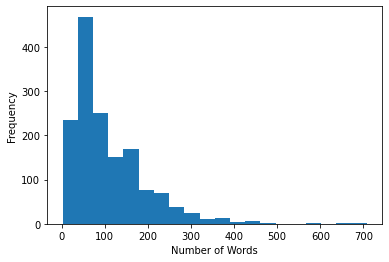

In [18]:
ax = num_words.plot(kind='hist', bins=20)
ax.set_xlabel('Number of Words');

### 3.2 Word Cloud

In [19]:
text = ' '.join(coin_desc_df.clean_desc)

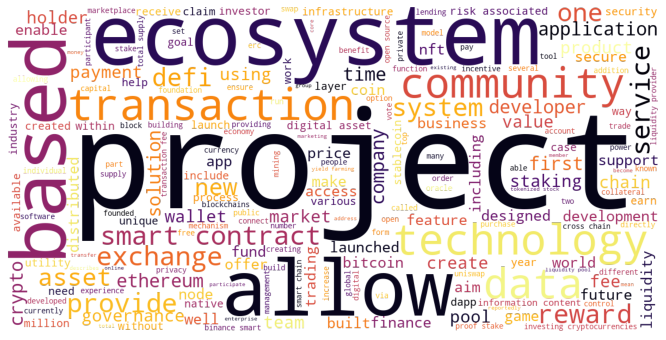

In [20]:
eda.wordcloud(text, width=1200, height=600, colormap='inferno');

### 3.3 Frequent Pairs of Words (per paragraph)

In [21]:
clean_paragraphs = eda.get_clean_paragraphs(coin_desc, attr='clean_desc')

In [22]:
words = list(map(str.split, clean_paragraphs))
pairs = fim.fpgrowth(words, zmin=2, zmax=2, supp=0.50)

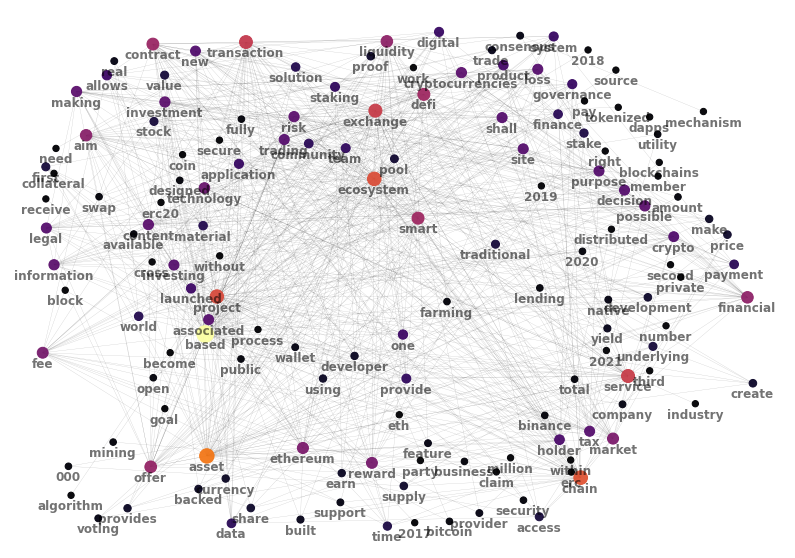

In [23]:
eda.frequent_pairs(
    pairs[:750], cmap='inferno', k=10, iterations=2, figsize=(14, 10),
    font_size=12
);

## 4 Latent Semantic Analysis

In [24]:
coin_desc_df.set_index('slug', inplace=True)

### 4.1 TF-IDF Bag Of Words

In [25]:
bow = lsa.get_bow(coin_desc_df, column='clean_desc')

In [26]:
bow.head()

,000,100,200,2013,2014,2015,2016,2017,2018,2019,...,worth,would,writing,www,year,yearn,yet,yfi,yield,zero
slug,,,,,,,,,,,,,,,,,,,,,
bitcoin,0.000000,0.047789,0.06672,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.071705,0.053177,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
litecoin,0.046701,0.048420,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.066512,0.0,0.0,0.0,0.0,0.0
xrp,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
dogecoin,0.000000,0.000000,0.00000,0.000000,0.143466,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
digibyte,0.000000,0.000000,0.00000,0.114102,0.093522,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### 4.2 LSA

In [27]:
df_lsa, lsa_components, exp_var_ratio = lsa.get_svd(bow, axis_name='slug')

In [28]:
df_lsa.head()

,SV 1,SV 2,SV 3,SV 4,SV 5,SV 6,SV 7,SV 8,SV 9,SV 10,...,SV 1444,SV 1445,SV 1446,SV 1447,SV 1448,SV 1449,SV 1450,SV 1451,SV 1452,SV 1453
slug,,,,,,,,,,,,,,,,,,,,,
bitcoin,0.278226,-0.083665,-0.025391,-0.065240,-0.131566,-0.037094,0.028761,0.026876,-0.176178,0.012815,...,-5.551115e-17,6.071532e-18,-5.204170e-17,2.862294e-17,-5.030698e-17,-1.908196e-17,5.551115e-17,-4.250073e-17,-5.421011e-18,-9.312280e-18
litecoin,0.185220,-0.042735,-0.029930,-0.035043,-0.060176,-0.042736,0.010916,-0.058674,-0.169119,0.039908,...,-6.093216e-17,6.071532e-17,-4.336809e-19,-6.938894e-18,2.602085e-17,-1.973248e-17,-2.927346e-18,7.459311e-17,-4.185020e-17,3.343239e-17
xrp,0.232484,-0.078328,-0.025037,-0.063264,-0.134460,-0.007266,0.018327,-0.000980,-0.133048,-0.010505,...,-3.816392e-17,8.066464e-17,5.551115e-17,1.387779e-17,5.204170e-17,-7.285839e-17,-3.903128e-18,2.428613e-17,-2.471981e-17,-5.183842e-19
dogecoin,0.217544,-0.035933,-0.039487,-0.032996,-0.042896,-0.041595,-0.001769,0.007595,-0.157345,0.073154,...,-4.770490e-17,-2.688821e-17,-1.214306e-17,1.908196e-17,-8.090859e-18,5.204170e-18,-2.949030e-17,5.377643e-17,4.553649e-18,-1.288634e-17
digibyte,0.275143,-0.089166,-0.032542,-0.066232,-0.102861,0.056712,-0.006358,-0.091022,-0.096554,0.013423,...,4.748806e-17,-3.469447e-17,-3.382711e-17,-1.024571e-17,-3.876023e-17,1.647987e-17,5.247539e-17,-4.683753e-17,-1.192622e-17,2.357123e-17


### 4.3 LSA Plots

#### Explained Variance Ratio

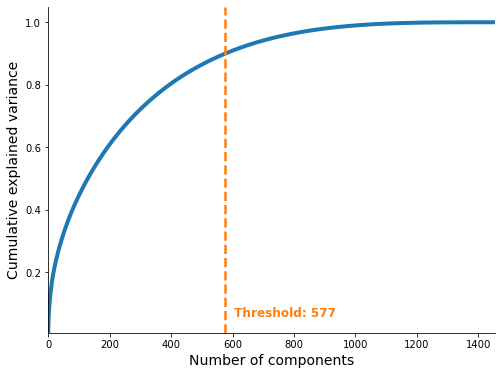

In [29]:
thresh, fig, ax = lsa_plot.exp_var(exp_var_ratio)

#### Word Weights

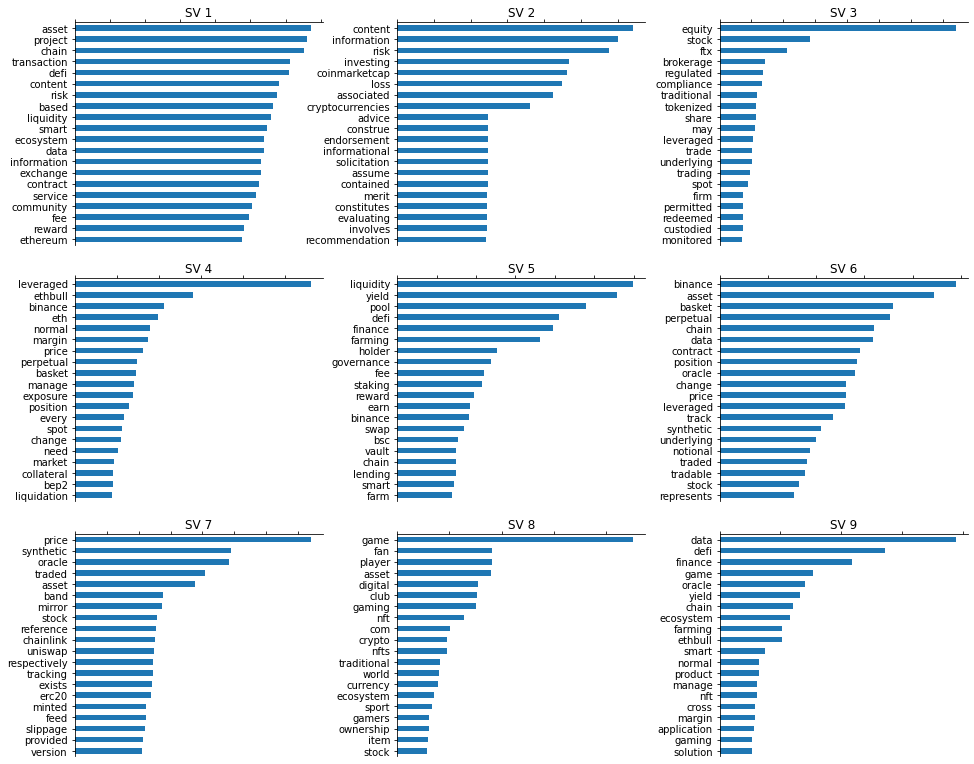

In [30]:
lsa_plot.word_weights(lsa_components, 9);

#### LSA Analysis Plot

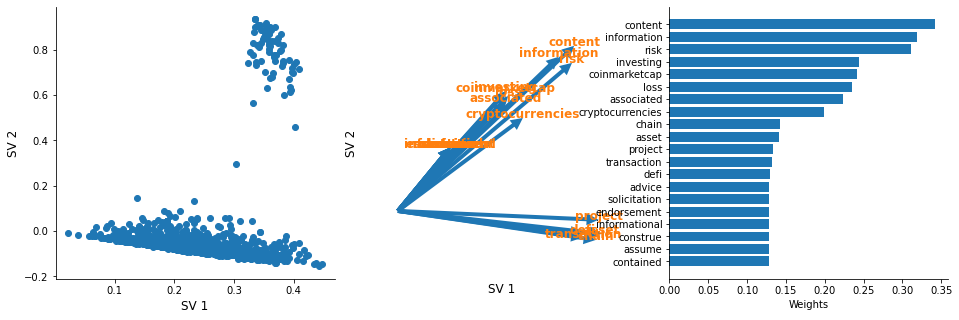

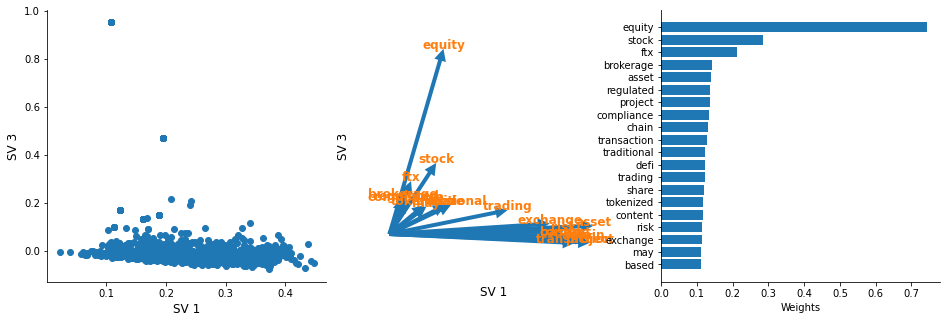

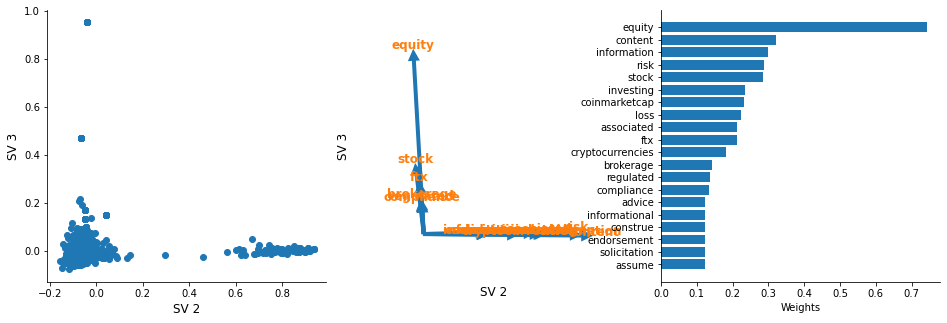

In [31]:
cols = ['SV 1', 'SV 2', 'SV 3']
lsa_plot.lsas(df_lsa, lsa_components, cols, margin=0.20, wspace=0.10);

## 5 Bitcoin Network

### 5.1 Adjacency Matrix

In [32]:
adj_matrix = ns.adjacency_matrix.get_adjacency_matrix(df_lsa, thresh)
adj_matrix = adj_matrix.fillna(0)

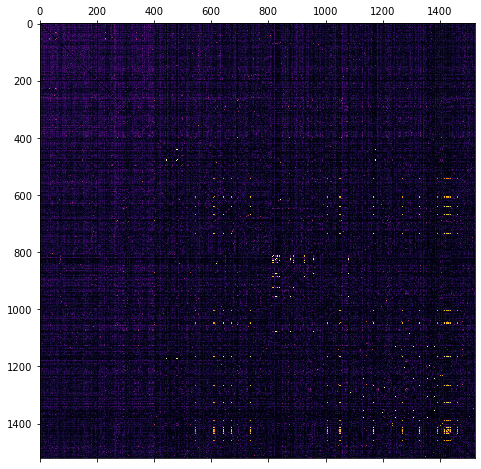

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(adj_matrix, cmap='inferno');

### 5.2 Network Statistics

#### Building the Network

In [34]:
bitcoin_network = ns.bitcoin_network.BitcoinNetwork(adj_matrix)

#### Simple Statistics

In [35]:
bitcoin_network.simple_stats()

,N,L,$\langle k \rangle$
Bitcoin Network,1522.0,67537.011842,88.747716


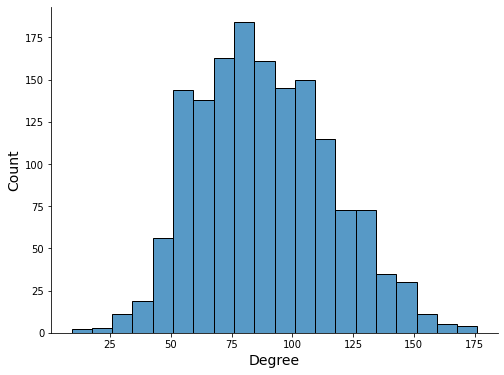

In [36]:
bitcoin_network.degree_distribution();

## 6 Cryptocurrency Selection

In [37]:
listings = utils.load_pickle('data/listings.pkl')
coin_selector = ns.coin_selector.CoinSelector(bitcoin_network.G, listings)

In [38]:
coin_selector.get_central_coins()

,slug
tag,
1confirmation-portfolio,kusama
a16z-portfolio,orchid
ai-big-data,dxchain-token
alameda-research-portfolio,synthetix-network-token
amm,bakerytoken
...,...
x13,stealth
yearn-partnerships,pickle-finance
yield-aggregator,beefy-finance


In [39]:
coin_selector.get_coin_profits(top_k=20, days=['30d', '60d', '90d'])

,percent_change_30d,percent_change_60d,percent_change_90d
central_coins_30d,23.026588,128.906882,307.479396
cmc_coins_30d,20.377611,84.669375,176.368601
central_coins_60d,24.665156,114.071544,274.481043
cmc_coins_60d,15.950473,53.792248,143.090535
central_coins_90d,22.133077,87.681181,145.143062
cmc_coins_90d,22.921895,68.142031,125.034091


In [40]:
central_nodes = []
for tag, g in coin_selector.tag_subgraphs.items():
    central_nodes.append([
        *max(dict(g.degree(weight='weight')).items(), key=lambda x: x[1]),
        g.order()
    ])

In [43]:
data = pd.DataFrame(sorted(central_nodes, key=lambda x: -x[1]),
                    columns=['slug', 'centrality', 'subgraph_order'])

In [44]:
data['centrality/order'] = data['centrality'] / data['subgraph_order']

In [45]:
pd.DataFrame(sorted(dict(coin_selector.G.degree(weight='weight')).items(),
                    key=lambda x: -x[1])[:20],
             columns=['slug', 'centrality'])

,slug,centrality
0,universa,176.154398
1,synthetix-network-token,173.553881
2,kyber-network,171.829721
3,polygon,168.218169
4,sparkpoint,165.029158
5,abbc-coin,164.503431
6,nano,162.965287
7,steem,160.593795
8,sparkpoint-fuel,159.679278
9,0x,159.205668


In [46]:
data.nlargest(20, 'centrality/order')

,slug,centrality,subgraph_order,centrality/order
7,trabzonspor-fan-token,10.281925,12,0.856827
0,google-tokenized-stock-ftx,31.068432,47,0.661030
13,trabzonspor-fan-token,8.941040,14,0.638646
17,sxtz,8.060875,14,0.575777
51,pylon-network,2.529184,5,0.505837
26,storj,6.029053,20,0.301453
18,illuvium,7.976001,27,0.295407
28,dia,5.533669,19,0.291246
43,bdollar,2.883985,10,0.288399
99,siren,1.106459,4,0.276615


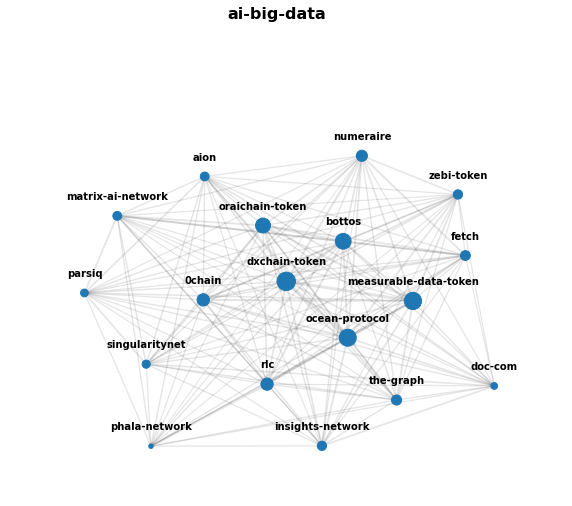

In [47]:
fig, ax = coin_selector.plot_tag(
    'ai-big-data', ylim=(-0.55, 0.55), figsize=(10, 8));

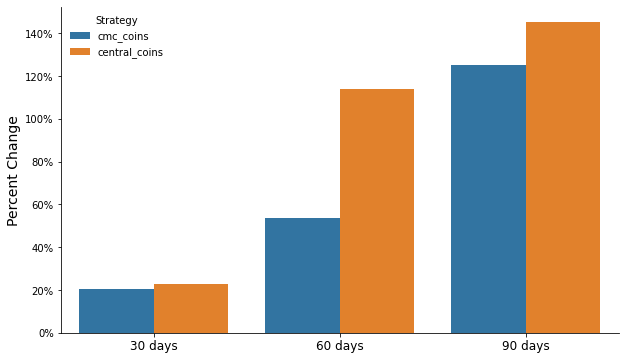

In [48]:
fig, ax = coin_selector.plot_profits()

In [49]:
df_listings = coin_selector.df_listings

In [50]:
centrality_order = data.drop_duplicates('slug').nlargest(20, 'centrality/order').slug

In [51]:
coin_selector.df_central_coins = df_listings.loc[df_listings.slug.isin(centrality_order)]

In [52]:
coin_selector.get_coin_profits(days=['30d', '60d', '90d'])

,percent_change_30d,percent_change_60d,percent_change_90d
central_coins_30d,36.671929,115.205920,523.162552
cmc_coins_30d,20.377611,84.669375,176.368601
central_coins_60d,36.671929,115.205920,523.162552
cmc_coins_60d,15.950473,53.792248,143.090535
central_coins_90d,36.671929,115.205920,523.162552
cmc_coins_90d,22.921895,68.142031,125.034091


(<Figure size 720x432 with 1 Axes>, <AxesSubplot:ylabel='Percent Change'>)

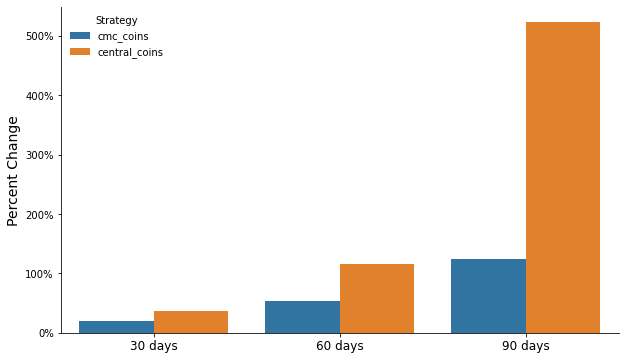

In [53]:
coin_selector.plot_profits()